<a href="https://colab.research.google.com/github/blu-geek/Demo/blob/main/Dataverse_Insurance_PredictionModule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Auto-ML with PyCaret - Kickstarter

![](https://i.imgur.com/cWzC62x.png)

 

# 1 - Objective


The objective of this notebook will be to tackle a classification problem using the power of PyCaret. We will be exploring the following features and capabilities of PyCaret along the way:

-  __Getting Data:__ Learn how to import default datasets from PyCaret repository

-  __Environment Setup:__ Learn how to setup an experiment in PyCaret and get started with classification tasks!

-  __Compare Models:__ Learn how to compare multiple machine learning models for the given classification task based on model evaluation metrics

-  __Create Model:__ Learn how to create specific classifical models, perform stratified cross validation and evaluate classification metrics

-  __Tune Model:__ Learn how to automatically tune the hyper-parameters of classification models

-  __Plot Model:__ Learn how to analyze model performance using various diagnostic plots

-  __Finalize Model:__ Learn how to finalize the best model at the end of the experiment

-  __Predict Model:__ Learn how to make predictions on new / unseen data 

-  __Save / Load Model:__ Learn how to save / load a model for future use

# 2 - Install PyCaret

The first step to get started is to install `pycaret`. 

Run the following two lines




In [ ]:
!pip install pycaret --quiet

In [ ]:
!pip install -U jinja2 # https://github.com/pycaret/pycaret/issues/2591 to bypass import errors later on

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


## Restart the Kernel now and then proceed by running the following cells as usual

## 2.1 - Enable Interactive Visuals

If you are using Google Colab, please run the following to enable interactive visuals

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# 3 - Binary Classification

The objective in this notebook will be to solve a predictive machine learning classification problem. To be more specific, it is going to be binary classification.

Binary classification is a supervised machine learning technique where the key objective is to predict a response variable given a set of independent variables (features). The response variable is categorical, having two discrete class labels, such as 1/0, Yes/No, Positive/Negative, Default/Not-Default and so on. 

A few real world use cases for classification are listed below:

- Fraud detection models to detect if a transaction is fraudulent or not fraudulent
- A "pass or fail" test method or quality control in factories, i.e. deciding if a specification has or has not been met – a go/no-go classification.
- Sentiment Analysis -> Positive or Negative

# 4 - PyCaret Classification Module

PyCaret's `classification` module (`pycaret.classification`) is a supervised machine learning module which is used for training, tuning, evaluating and deploying classification models. 

The PyCaret `classification` module can be used for Binary or Multi-class classification problems. It has over 18 algorithms and 14 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's classification module has it all.

Do check out [`pycaret.classification`'s documentation](https://pycaret.gitbook.io/docs/get-started/quickstart#classification)and [full-fledged APIs](https://pycaret.readthedocs.io/en/latest/api/classification.html) as needed!

# 5 - Getting the Data

We will be using a popular open-source dataset, called the "Adult" dataset also known as "Census Income" dataset.

Key Objective: Predict whether income exceeds $50K/yr based on census data

You can download the data from the original source [found here](https://archive.ics.uci.edu/ml/datasets/adult) 


and load it using `pandas` or you can use PyCaret's data respository to load the data using the `get_data()` function (This will require an internet connection).

The PyCaret version of the dataset is slightly more processed and is a subset.

## 5.1 - Data Retrieval

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Import all the necessary modules 
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
train_df = pd.read_csv('/content/sample_data/train_file.csv',index_col=0)
train_df.head()

policy_tenure  age_of_car  age_of_policyholder area_cluster  \
policy_id                                                                
ID00001         0.515874        0.05             0.644231           C1   
ID00002         0.672619        0.02             0.375000           C2   
ID00003         0.841110        0.02             0.384615           C3   
ID00004         0.900277        0.11             0.432692           C4   
ID00005         0.596403        0.11             0.634615           C5   

           population_density  make segment model fuel_type     max_torque  \
policy_id                                                                    
ID00001                  4990     1       A    M1       CNG   60Nm@3500rpm   
ID00002                 27003     1       A    M1       CNG   60Nm@3500rpm   
ID00003                  4076     1       A    M1       CNG   60Nm@3500rpm   
ID00004                 21622     1      C1    M2    Petrol  113Nm@4400rpm   
ID00005                 34738     2       A    M3    Petrol   91Nm@4250rpm   

           ... is_brake_assist is_power_door_locks  is_central_locking  \
policy_id  ...                                                           
ID00001    ...              No                  No                  No   
ID00002    ...              No                  No                  No   
ID00003    ...              No                  No                  No   
ID00004    ...             Yes                 Yes                 Yes   
ID00005    ...              No                 Yes                 Yes   

          is_power_steering is_driver_seat_height_adjustable  \
policy_id                                                      
ID00001                 Yes                               No   
ID00002                 Yes                               No   
ID00003                 Yes                               No   
ID00004                 Yes                              Yes   
ID00005                 Yes                               No   

          is_day_night_rear_view_mirror is_ecw is_speed_alert ncap_rating  \
policy_id                                                                   
ID00001                              No     No            Yes           0   
ID00002                              No     No            Yes           0   
ID00003                              No     No            Yes           0   
ID00004                             Yes    Yes            Yes           2   
ID00005                             Yes    Yes            Yes           2   

           is_claim  
policy_id            
ID00001           0  
ID00002           0  
ID00003           0  
ID00004           0  
ID00005           0  

[5 rows x 43 columns]

In [ ]:
test_df=pd.read_csv('/content/sample_data/test_file.csv',index_col=0)
test_df.head()

policy_tenure  age_of_car  age_of_policyholder area_cluster  \
policy_id                                                                
ID58593         0.341732        0.00             0.586538           C3   
ID58594         0.307241        0.13             0.442308           C8   
ID58595         0.327924        0.12             0.451923           C8   
ID58596         0.782654        0.01             0.461538           C5   
ID58597         1.233404        0.02             0.634615           C5   

           population_density  make segment model fuel_type     max_torque  \
policy_id                                                                    
ID58593                  4076     1       A    M1       CNG   60Nm@3500rpm   
ID58594                  8794     1      B2    M6    Petrol  113Nm@4400rpm   
ID58595                  8794     2       A    M3    Petrol   91Nm@4250rpm   
ID58596                 34738     1       A    M1       CNG   60Nm@3500rpm   
ID58597                 34738     1       A    M1       CNG   60Nm@3500rpm   

           ... is_rear_window_defogger is_brake_assist  is_power_door_locks  \
policy_id  ...                                                                
ID58593    ...                      No              No                   No   
ID58594    ...                      No             Yes                  Yes   
ID58595    ...                      No              No                  Yes   
ID58596    ...                      No              No                   No   
ID58597    ...                      No              No                   No   

          is_central_locking is_power_steering  \
policy_id                                        
ID58593                   No               Yes   
ID58594                  Yes               Yes   
ID58595                  Yes               Yes   
ID58596                   No               Yes   
ID58597                   No               Yes   

          is_driver_seat_height_adjustable is_day_night_rear_view_mirror  \
policy_id                                                                  
ID58593                                 No                            No   
ID58594                                Yes                           Yes   
ID58595                                 No                           Yes   
ID58596                                 No                            No   
ID58597                                 No                            No   

          is_ecw is_speed_alert  ncap_rating  
policy_id                                     
ID58593       No            Yes            0  
ID58594      Yes            Yes            2  
ID58595      Yes            Yes            2  
ID58596       No            Yes            0  
ID58597       No            Yes            0  

[5 rows x 42 columns]

In [ ]:
ss=pd.read_csv('/content/sample_data/sample_submission_file.csv',index_col=0)
ss.head()

is_claim
policy_id          
ID58593           1
ID58594           1
ID58595           1
ID58596           1
ID58597           1

In [ ]:
# Checking the data types and the count we can see there are no missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58592 entries, ID00001 to ID58592
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  a

In [ ]:
print('The shape of the Train set is',train_df.shape)
print ('The shape of the Test set is',test_df.shape)

The shape of the Train set is (58592, 43)
The shape of the Test set is (39063, 42)


In [ ]:
train_df.iloc[25:30]

policy_tenure  age_of_car  age_of_policyholder area_cluster  \
policy_id                                                                
ID00026         0.240959        0.07             0.317308           C3   
ID00027         0.775664        0.02             0.375000          C11   
ID00028         0.524681        0.15             0.394231           C2   
ID00029         0.543358        0.07             0.326923           C2   
ID00030         1.124538        0.07             0.490385           C8   

           population_density  make segment model fuel_type     max_torque  \
policy_id                                                                    
ID00026                  4076     1      B2    M6    Petrol  113Nm@4400rpm   
ID00027                  6108     1       A    M1       CNG   60Nm@3500rpm   
ID00028                 27003     1      B2    M7    Petrol  113Nm@4400rpm   
ID00029                 27003     1      B2    M6    Petrol  113Nm@4400rpm   
ID00030                  8794     1      B2    M6    Petrol  113Nm@4400rpm   

           ... is_brake_assist is_power_door_locks  is_central_locking  \
policy_id  ...                                                           
ID00026    ...             Yes                 Yes                 Yes   
ID00027    ...              No                  No                  No   
ID00028    ...             Yes                 Yes                 Yes   
ID00029    ...             Yes                 Yes                 Yes   
ID00030    ...             Yes                 Yes                 Yes   

          is_power_steering is_driver_seat_height_adjustable  \
policy_id                                                      
ID00026                 Yes                              Yes   
ID00027                 Yes                               No   
ID00028                 Yes                              Yes   
ID00029                 Yes                              Yes   
ID00030                 Yes                              Yes   

          is_day_night_rear_view_mirror is_ecw is_speed_alert ncap_rating  \
policy_id                                                                   
ID00026                             Yes    Yes            Yes           2   
ID00027                              No     No            Yes           0   
ID00028                             Yes    Yes            Yes           0   
ID00029                             Yes    Yes            Yes           2   
ID00030                             Yes    Yes            Yes           2   

           is_claim  
policy_id            
ID00026           0  
ID00027           0  
ID00028           0  
ID00029           0  
ID00030           1  

[5 rows x 43 columns]

In [ ]:
# DATA PREPROCESSING
# make, max_torque, max_power and airbags ought to be numerical. As such we would need to preprocess and convert 
train_df['airbags']= train_df['airbags'].astype(int)
train_df['airbags'].head()

policy_id
ID00001    2
ID00002    2
ID00003    2
ID00004    2
ID00005    2
Name: airbags, dtype: int64

In [ ]:
test_df['airbags']= test_df['airbags'].astype(int)
test_df['airbags'].head()

policy_id
ID58593    2
ID58594    2
ID58595    2
ID58596    2
ID58597    2
Name: airbags, dtype: int64

In [ ]:
train_df['make']= train_df['make'].astype(int)
test_df['make']= test_df['make'].astype(int)

In [ ]:
# Let us see the nature of the values in the train set
num_to_display= 15
for colname in train_df.dtypes[train_df.dtypes=='object'].index:
  value_count= train_df[colname].value_counts(dropna=False) # display returns counts inclusive of NAN
  print(value_count[:num_to_display])
  if len(value_count)>num_to_display:
      print(f'only displaying {num_to_display} of {len(value_count)} values.')
  print('\n\n')


C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
Name: area_cluster, dtype: int64
only displaying 15 of 22 values.



B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64



M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dtype: int64



Petrol    20532
CNG       20330
Diesel    17730
Name: fuel_type, dtype: int64



113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm       1209
170Nm@4000rpm       363
Name: max_torque, dtype: int64



88.50bhp@6000rpm     17796
40.36bhp@6000rpm     14948
113.45bhp@4000rpm    14018
55.92bhp@5300rpm   

In [ ]:
# Lets see if there is a correlation between Power and Torque
from pandas_profiling import ProfileReport

In [ ]:
train_df[['num_torque','string_torque']] = train_df['max_torque'].str.split('Nm@', 1, expand=True)
train_df = train_df.drop(['max_torque'], axis = 1)
train_df['string_torque'] = train_df['string_torque'].map(lambda x: x.lstrip('rpm').rstrip('rpm'))
train_df[['num_torque','string_torque']].head()

num_torque string_torque
policy_id                         
ID00001           60          3500
ID00002           60          3500
ID00003           60          3500
ID00004          113          4400
ID00005           91          4250

In [ ]:
test_df[['num_torque','string_torque']] = test_df['max_torque'].str.split('Nm@', 1, expand=True)
test_df = test_df.drop(['max_torque'], axis = 1)
test_df['string_torque'] = test_df['string_torque'].map(lambda x: x.lstrip('rpm,').rstrip('rpm,'))
test_df[['num_torque','string_torque']].head()

num_torque string_torque
policy_id                         
ID58593           60          3500
ID58594          113          4400
ID58595           91          4250
ID58596           60          3500
ID58597           60          3500

In [ ]:
train_df[['num_power','string_power']] = train_df['max_power'].str.split('bhp@', 1, expand=True)
train_df = train_df.drop(['max_power'], axis = 1)
train_df['string_power'] = train_df['string_power'].map(lambda x: x.lstrip('rpm').rstrip('rpm'))
train_df[['num_power','string_power']].head()

num_power string_power
policy_id                       
ID00001       40.36         6000
ID00002       40.36         6000
ID00003       40.36         6000
ID00004       88.50         6000
ID00005       67.06         5500

In [ ]:
test_df[['num_power','string_power']] = test_df['max_power'].str.split('bhp@', 1, expand=True)
test_df = test_df.drop(['max_power'], axis = 1)
test_df['string_power'] = test_df['string_power'].map(lambda x: x.lstrip('rpm,').rstrip('rpm,'))
test_df[['num_power','string_power']].head()

num_power string_power
policy_id                       
ID58593       40.36         6000
ID58594       88.50         6000
ID58595       67.06         5500
ID58596       40.36         6000
ID58597       40.36         6000

In [ ]:
train_df.head()

policy_tenure  age_of_car  age_of_policyholder area_cluster  \
policy_id                                                                
ID00001         0.515874        0.05             0.644231           C1   
ID00002         0.672619        0.02             0.375000           C2   
ID00003         0.841110        0.02             0.384615           C3   
ID00004         0.900277        0.11             0.432692           C4   
ID00005         0.596403        0.11             0.634615           C5   

           population_density  make segment model fuel_type  \
policy_id                                                     
ID00001                  4990     1       A    M1       CNG   
ID00002                 27003     1       A    M1       CNG   
ID00003                  4076     1       A    M1       CNG   
ID00004                 21622     1      C1    M2    Petrol   
ID00005                 34738     2       A    M3    Petrol   

                  engine_type  ...  is_driver_seat_height_adjustable  \
policy_id                      ...                                     
ID00001     F8D Petrol Engine  ...                                No   
ID00002     F8D Petrol Engine  ...                                No   
ID00003     F8D Petrol Engine  ...                                No   
ID00004    1.2 L K12N Dualjet  ...                               Yes   
ID00005               1.0 SCe  ...                                No   

          is_day_night_rear_view_mirror is_ecw is_speed_alert ncap_rating  \
policy_id                                                                   
ID00001                              No     No            Yes           0   
ID00002                              No     No            Yes           0   
ID00003                              No     No            Yes           0   
ID00004                             Yes    Yes            Yes           2   
ID00005                             Yes    Yes            Yes           2   

          is_claim num_torque  string_torque  num_power string_power  
policy_id                                                             
ID00001          0         60           3500      40.36         6000  
ID00002          0         60           3500      40.36         6000  
ID00003          0         60           3500      40.36         6000  
ID00004          0        113           4400      88.50         6000  
ID00005          0         91           4250      67.06         5500  

[5 rows x 45 columns]

In [ ]:
test_df.head()

policy_tenure  age_of_car  age_of_policyholder area_cluster  \
policy_id                                                                
ID58593         0.341732        0.00             0.586538           C3   
ID58594         0.307241        0.13             0.442308           C8   
ID58595         0.327924        0.12             0.451923           C8   
ID58596         0.782654        0.01             0.461538           C5   
ID58597         1.233404        0.02             0.634615           C5   

           population_density  make segment model fuel_type  \
policy_id                                                     
ID58593                  4076     1       A    M1       CNG   
ID58594                  8794     1      B2    M6    Petrol   
ID58595                  8794     2       A    M3    Petrol   
ID58596                 34738     1       A    M1       CNG   
ID58597                 34738     1       A    M1       CNG   

                 engine_type  ...  is_power_steering  \
policy_id                     ...                      
ID58593    F8D Petrol Engine  ...                Yes   
ID58594    K Series Dual jet  ...                Yes   
ID58595              1.0 SCe  ...                Yes   
ID58596    F8D Petrol Engine  ...                Yes   
ID58597    F8D Petrol Engine  ...                Yes   

          is_driver_seat_height_adjustable is_day_night_rear_view_mirror  \
policy_id                                                                  
ID58593                                 No                            No   
ID58594                                Yes                           Yes   
ID58595                                 No                           Yes   
ID58596                                 No                            No   
ID58597                                 No                            No   

          is_ecw is_speed_alert ncap_rating num_torque  string_torque  \
policy_id                                                               
ID58593       No            Yes           0         60           3500   
ID58594      Yes            Yes           2        113           4400   
ID58595      Yes            Yes           2         91           4250   
ID58596       No            Yes           0         60           3500   
ID58597       No            Yes           0         60           3500   

           num_power string_power  
policy_id                          
ID58593        40.36         6000  
ID58594        88.50         6000  
ID58595        67.06         5500  
ID58596        40.36         6000  
ID58597        40.36         6000  

[5 rows x 44 columns]

In [ ]:
train_df['num_torque']=train_df['num_torque'].astype(float)
train_df['string_torque']= train_df['string_torque'].astype(float)
train_df['num_power'] = train_df['num_power'].astype(float)
train_df['string_power']=train_df['string_power'].astype(float)
test_df['num_torque']=test_df['num_torque'].astype(float)
test_df['string_torque']= test_df['string_torque'].astype(float)
test_df['num_power'] = test_df['num_power'].astype(float)
test_df['string_power']=test_df['string_power'].astype(float)

## 5.2 - Split Train Data into Train- Test Datasets

In order to demonstrate the `predict_model()` function on unseen data, a holdout sample of 15% records has been withheld from the original dataset to be used for predictions. 

This will be your true unseen test dataset to be used at the end once all training is complete as a simulation of live real data.

In [ ]:
# create train - validation datasets
#data_train = df.sample(frac=0.85, random_state=42)
#test = df.drop(data_train.index)

# reset row numbers \ indices
#data_train.reset_index(inplace=True, drop=True)
#data_test.reset_index(inplace=True, drop=True)
#print('Data for Modeling: ' + str(data_train.shape))
#print('Unseen Data For Predictions: ' + str(data_test.shape))

## 5.3 - Understanding the Data

Let's try to understand our dataset now in terms of the given attributes.

We use a dataset modified dataset from UCI called [Adult Data Set
](https://archive.ics.uci.edu/ml/datasets/adult). 

This dataset contains census data and details about various aspects of people and their income.

There are 32561 samples and 14 features. 

Brief descriptions of each column are as follows:

- __age__: continuous; age of the person

- __workclass__: categorical; working class of the person;
Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- __education__: categorical; educational qualification of the person;
Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- __education-num__: discrete numeric; educational qualification of the person as a encoded value; 

- __marital-status__: categorical; marital status of the person; 
Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- __occupation__: categorical; occupation of the person;
Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- __relationship__: categorical; relationship information;
Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- __race__: categorical; race information;
White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- __sex__: categorical; gender of the person; 
Female, Male.

- __capital-gain__: continuous; overall capital gain 

- __capital-loss__: continuous; overall capital loss

- __hours-per-week__: continuous; working hours per week

- __native-country__: categorical; native country of residence;
United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- **`income >50K`**: Whether the income of the person is more than $50K (1=yes, 0=no) Target Column

The original dataset and data dictionary can be [found here](https://archive.ics.uci.edu/ml/datasets/adult).

# 6 - PyCaret Environment Setup

The `setup()` function initializes the environment in `pycaret` and creates the transformation pipeline to prepare the data for modeling and deployment. 

`setup()` must be called before executing any other function in `pycaret`. 

It takes two mandatory parameters: a `pandas` dataframe and the name of the target column. 

All other parameters are optional and are used to customize the pre-processing pipeline.

***This is a heavily loaded function because you can use its arguments to do a lot of powerful pre-processing, feature engineering and feature selection steps!***

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. 

The data types are usually inferred correctly but this is not always the case. 

To account for this, PyCaret displays a table containing the features and their inferred data types after `setup()` is executed. 

If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. 

Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. 

These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

If there are columns which have incorrect indentified data types, we can leverage the `numeric_features` and `categorical_features` parameters in `setup()`.

In [ ]:
from pycaret.classification import *

In [ ]:
experiment=setup(data=train_df, target="is_claim",fold = 5,session_id= 42)

Description             Value
0                               session_id                42
1                                   Target          is_claim
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data       (58592, 45)
5                           Missing Values             False
6                         Numeric Features                 9
7                     Categorical Features                35
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set       (41014, 60)
12                    Transformed Test Set       (17578, 60)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                 5
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              7e77
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='is_claim',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. 

Most of the information is related to the pre-processing pipeline which is constructed when `setup()` is executed. 

We are not doing any extensive pre-processing to start with, however a few important things to note at this stage include:

- **session_id :**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the `session_id` is set as `123` for later reproducibility.

- **Target Type :**  Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

- **Label Encoded :**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this experiment no label encoding is required since the target variable is of type numeric.

- **Original Data :**  Displays the original shape of the dataset. In this experiment (27677, 14) means 27,677 samples and 14 features including the target column. 

- **Missing Values :**  When there are missing values in the original data this will show as True. For this experiment there are several missing values in the dataset. 

- **Numeric Features :**  The number of features inferred as numeric. In this dataset, 4 features are inferred as numeric. 

- **Categorical Features :**  The number of features inferred as categorical. In this dataset, 9 features are inferred as categorical.

- **Transformed Train Set :**  Displays the shape of the transformed training set. Notice that the original shape of (27677, 24) is transformed into (19373, 104) for the transformed train set and the number of features have increased to 104 due to categorical encoding 

- **Transformed Test Set :**  Displays the shape of the transformed test/hold-out set. There are 8304 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the `train_size` parameter in setup. Can also be used as a validation set if you make decisions of choosing the best model based on this subset.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. 

Most of the parameters in `setup()` are optional and used for customizing the pre-processing pipeline.



# 7 - Comparing all Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). 

This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

We use a standard 5-fold cross validation

In [ ]:
Best_model= compare_models(fold=5, sort ='F1')

Model  Accuracy     AUC  Recall   Prec.  \
qda       Quadratic Discriminant Analysis    0.6678  0.4997  0.3073  0.0613   
dt               Decision Tree Classifier    0.8731  0.5085  0.0912  0.0762   
svm                   SVM - Linear Kernel    0.5774  0.0000  0.4097  0.0564   
et                 Extra Trees Classifier    0.9277  0.5460  0.0186  0.1021   
rf               Random Forest Classifier    0.9333  0.5645  0.0093  0.1227   
knn                K Neighbors Classifier    0.9345  0.5157  0.0046  0.1022   
lr                    Logistic Regression    0.9369  0.5120  0.0000  0.0000   
nb                            Naive Bayes    0.9369  0.5617  0.0000  0.0000   
ridge                    Ridge Classifier    0.9369  0.0000  0.0000  0.0000   
ada                  Ada Boost Classifier    0.9369  0.6347  0.0000  0.0000   
gbc          Gradient Boosting Classifier    0.9368  0.6549  0.0000  0.0000   
lda          Linear Discriminant Analysis    0.9369  0.6125  0.0000  0.0000   
lightgbm  Light Gradient Boosting Machine    0.9369  0.6361  0.0000  0.0000   
dummy                    Dummy Classifier    0.9369  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
qda       0.0986 -0.0020 -0.0014     0.370  
dt        0.0830  0.0154  0.0155     0.432  
svm       0.0612 -0.0025 -0.0033     1.510  
et        0.0314  0.0121  0.0172     5.936  
rf        0.0172  0.0084  0.0169     4.580  
knn       0.0089  0.0032  0.0083     3.858  
lr        0.0000  0.0000  0.0000     0.702  
nb        0.0000  0.0000  0.0000     0.078  
ridge     0.0000  0.0000  0.0000     0.094  
ada       0.0000 -0.0001 -0.0008     2.164  
gbc       0.0000 -0.0003 -0.0029     6.244  
lda       0.0000  0.0000  0.0000     0.466  
lightgbm  0.0000 -0.0000 -0.0006     0.604  
dummy     0.0000  0.0000  0.0000     0.072

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


Just one line of code has trained and evaluated around 14 models using cross validation. 

The score grid printed above by default is sorted using 'Accuracy' (highest to lowest) which can be changed by passing the `sort` parameter. 

For example `compare_models(sort = 'Recall')` will sort the grid by Recall instead of Accuracy. 

If you want to change the fold parameter from the default value of `10` to a different value then you can use the `fold` parameter. For example `compare_models(fold = 5)` will compare all models on 5 fold cross validation as we did above. 

Reducing the number of folds will improve the training time. By default, `compare_models` return the best performing model based on default sort order but can be used to return a list of top N models by using `n_select` parameter.

In [ ]:
Best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

Looks like boosting models have taken up the leaderboard above!

# 8 - Create ML Models

`create_model` is one of the most important functions in PyCaret and is often the starting point or foundation behind most of the PyCaret functionalities. 

As the name suggests this function trains and evaluates a model using cross validation that can be set with `fold` parameter. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa and MCC by fold. 

For the remaining part of this tutorial, we will work with the following two models as our candidate models. 

The selections are for illustration purposes only where we pick the best model which is a boosting model and a simple logistic model just to compare:

```
- Light Gradient Boosting Machine ('lightgbm')
- Logistic Regression ('lr')
```

There are 18 classifiers available in the model library of PyCaret. To see list of all classifiers either check the `docstring` or use `models` function to see the library.

In [ ]:
models()

INFO:logs:gpu_param set to False


Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
dummy                         sklearn.dummy.DummyClassifier   True

## 8.1 - Create Light Gradient Boosting Model

In [ ]:
lgbm=create_model('lightgbm',fold=5)

Accuracy     AUC  Recall  Prec.   F1   Kappa     MCC
Fold                                                      
0       0.9369  0.6449     0.0    0.0  0.0  0.0000  0.0000
1       0.9367  0.6500     0.0    0.0  0.0 -0.0002 -0.0029
2       0.9369  0.6271     0.0    0.0  0.0 -0.0002 -0.0029
3       0.9370  0.6129     0.0    0.0  0.0  0.0000  0.0000
4       0.9370  0.6320     0.0    0.0  0.0  0.0000  0.0000
Mean    0.9369  0.6333     0.0    0.0  0.0 -0.0001 -0.0011
Std     0.0001  0.0132     0.0    0.0  0.0  0.0001  0.0014

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## 8.2 - Create Logistic Regression Model

In [ ]:
Lrm= create_model('lr',fold=5)

Accuracy     AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                                  
0       0.9369  0.4736     0.0    0.0  0.0    0.0  0.0
1       0.9369  0.4781     0.0    0.0  0.0    0.0  0.0
2       0.9370  0.4915     0.0    0.0  0.0    0.0  0.0
3       0.9370  0.5751     0.0    0.0  0.0    0.0  0.0
4       0.9370  0.4722     0.0    0.0  0.0    0.0  0.0
Mean    0.9369  0.4981     0.0    0.0  0.0    0.0  0.0
Std     0.0001  0.0391     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
Lrm

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 9 - Tune ML Models

When a model is created using the `create_model()` function it uses the default hyperparameters to train the model. 

In order to tune hyperparameters, the [`tune_model()`](https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.tune_model) function is used. 

This function automatically tunes the hyperparameters of a model using `Randomized Search` on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model. 

To use the custom search grid, you can pass `custom_grid` parameter in the `tune_model` function (see 9.2 Logistic Regression tuning below).

## 9.1 Tune Light Gradient Boosting Model

In [ ]:
tuned_lgbm = tune_model(lgbm,fold=5)

Accuracy     AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                                  
0       0.9369  0.6730     0.0    0.0  0.0    0.0  0.0
1       0.9369  0.6631     0.0    0.0  0.0    0.0  0.0
2       0.9370  0.6469     0.0    0.0  0.0    0.0  0.0
3       0.9370  0.6366     0.0    0.0  0.0    0.0  0.0
4       0.9370  0.6468     0.0    0.0  0.0    0.0  0.0
Mean    0.9369  0.6533     0.0    0.0  0.0    0.0  0.0
Std     0.0001  0.0130     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 5
INFO:logs:LGBMClassifier(bagging_fraction=0.6, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=71, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=130, n_jobs=-1, num_leaves=4, objective=None,
               random_state=42, reg_alpha=0.3, reg_lambda=4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_lgbm

LGBMClassifier(bagging_fraction=0.6, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=71, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=130, n_jobs=-1, num_leaves=4, objective=None,
               random_state=42, reg_alpha=0.3, reg_lambda=4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## 9.2 Tune Logistic Regression Model

In [ ]:
tuned_lr=tune_model(estimator=Lrm,fold=5 ,custom_grid={
    'C': [0.01,0.1,1,10,100],
    'penalty': ['l1','l2','elasticnet'],
    'l1_ratio': [0.2,0.3]

})

Accuracy     AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                                  
0       0.9369  0.4738     0.0    0.0  0.0    0.0  0.0
1       0.9369  0.4782     0.0    0.0  0.0    0.0  0.0
2       0.9370  0.4917     0.0    0.0  0.0    0.0  0.0
3       0.9370  0.4665     0.0    0.0  0.0    0.0  0.0
4       0.9370  0.4725     0.0    0.0  0.0    0.0  0.0
Mean    0.9369  0.4765     0.0    0.0  0.0    0.0  0.0
Std     0.0001  0.0085     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 6
INFO:logs:LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.2, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_lr1 = tune_model(Lrm, fold=5)

Accuracy     AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                                  
0       0.9369  0.4736     0.0    0.0  0.0    0.0  0.0
1       0.9369  0.4781     0.0    0.0  0.0    0.0  0.0
2       0.9370  0.4915     0.0    0.0  0.0    0.0  0.0
3       0.9370  0.4665     0.0    0.0  0.0    0.0  0.0
4       0.9370  0.4721     0.0    0.0  0.0    0.0  0.0
Mean    0.9369  0.4764     0.0    0.0  0.0    0.0  0.0
Std     0.0001  0.0084     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=5.682, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


By default, `tune_model` optimizes `Accuracy` but this can be changed using `optimize` parameter. 

For example: `tune_model(lgbm, optimize = 'AUC')` will search for the hyperparameters of a Light Gradient Boosting Classifier that results in the highest `AUC` instead of `Accuracy`. 

For the purposes of this example, we have used the default metric `Accuracy` only for the sake of simplicity. 

Generally, when the dataset is imbalanced (such as the adult dataset we are working with) `Accuracy` is not a good metric for consideration. 

Metrics alone are not the only criteria you should consider when finalizing the best model for production. Other factors to consider include training time, standard deviation of kfolds etc. 

For now, let's move forward considering the Tuned Light Gradient Boosting Classifier `tuned_lgbm`, as our best model for the remainder of this tutorial.

# 10 - Plot ML Model Evaluation Diagnostics

Before model finalization, the `plot_model()` function can be used to analyze and evaluate the model performance across different aspects such as AUC, confusion_matrix, decision boundary etc. 

This function takes a trained model object and returns a plot based on the test / hold-out set. 

There are many different plots available, please see the `plot_model()` docstring for the list of available plots.

## 10.1 - Confusion Matrix

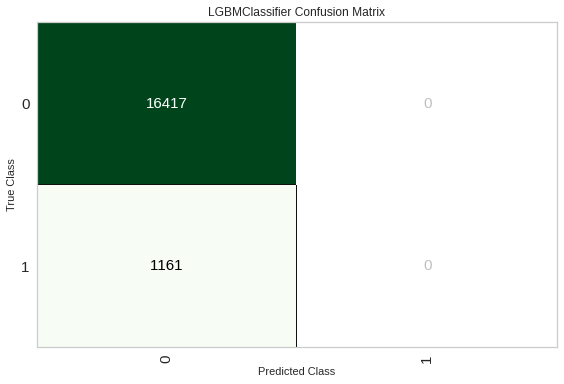

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lgbm, plot='confusion_matrix')

## 10.2 - Feature Importance

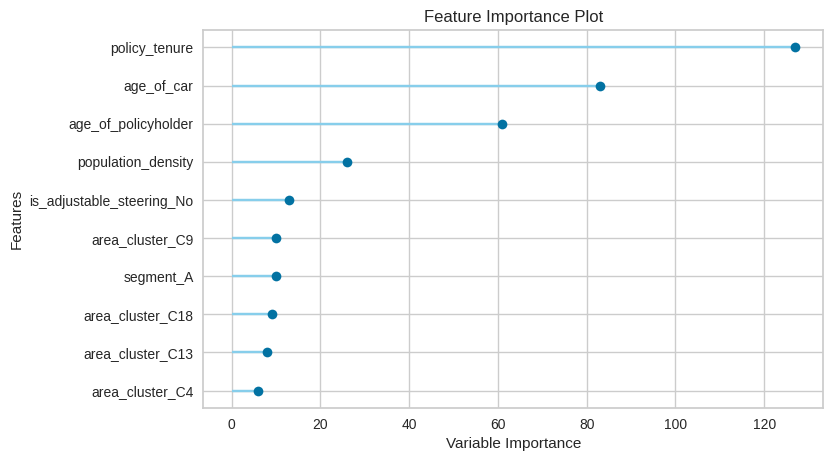

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lgbm, plot ='feature') 

*Another* way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. 

In [ ]:
evaluate_model(tuned_lgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=71, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=130, n_jobs=-1, num_leaves=4, objective=None,
               random_state=42, reg_alpha=0.3, reg_lambda=4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 11 - Predict on Test / Hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting on the test/hold-out set and reviewing the evaluation metrics. 

If you look at the information in Section 6 above, you will see that 30% (8304 samples) of the data has been separated out as test/hold-out sample. 

All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. The `plot_model` shows results on the Test Data.

We can use our trained model stored in the `tuned_lgbm` variable to get predictions from our test data and use them as necessary

In [ ]:
result=predict_model(tuned_lgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=71, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=130, n_jobs=-1, num_leaves=4, objective=None,
               random_state=42, reg_alpha=0.3, reg_lambda=4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall  Prec.   F1  \
0  Light Gradient Boosting Machine     0.934  0.6475     0.0    0.0  0.0   

   Kappa  MCC  
0    0.0  0.0

The accuracy on test/hold-out set is **`0.8746`** compared to **`0.8701`** achieved on the `tuned_lgbm` CV results earlier. 

This is not a significant difference. If there is a large variation between the test/hold-out and CV results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. 

In this case, we will move forward with finalizing the model and predicting on unseen data (the 15% that we had separated in the beginning and never exposed to PyCaret experiments).

# 12 - Finalize Model for Deployment

Model finalization is the last step in the experiment. 

A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. (more on advanced techniques in the next tutorial!).

This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. 


The `finalize_model()` function fits the model onto the complete dataset **including** the test/hold-out sample (30% in this case). The purpose of this function is to **train the model on the complete dataset** before it is deployed in production.

In [ ]:
final_model=finalize_model(tuned_lgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=71, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=130, n_jobs=-1, num_leaves=4, objective=None,
               random_state=42, reg_alpha=0.3, reg_lambda=4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(bagging_fraction=0.6, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_sampl

In [ ]:
#Final Light Gradient Boosting Model to be used for deployment
final_model

LGBMClassifier(bagging_fraction=0.6, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=71, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=130, n_jobs=-1, num_leaves=4, objective=None,
               random_state=42, reg_alpha=0.3, reg_lambda=4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Caution:** Once the model is finalized using `finalize_model()`, the entire dataset including the test/hold-out set is used for training. 

As such, if the model is used for predictions on the hold-out set after `finalize_model()` is used, the results will be misleading as you are trying to predict on the same data that was used for modeling. 

In order to demonstrate this point only, we will use `final_lgbm` under `predict_model()` to compare the information grid with the one above in section 11. 

In [ ]:
predict_model(final_model) # please note that this is not advisable/or best practise as such desist from it. Only predict on the original hold_out test_data as in cell 13 below

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=71, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=130, n_jobs=-1, num_leaves=4, objective=None,
               random_state=42, reg_alpha=0.3, reg_lambda=4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall  Prec.   F1  \
0  Light Gradient Boosting Machine     0.934  0.6711     0.0    0.0  0.0   

   Kappa  MCC  
0    0.0  0.0

policy_tenure  age_of_car  age_of_policyholder  population_density  \
0           0.285690        0.05             0.509615              4076.0   
1           0.122252        0.05             0.403846              8794.0   
2           0.213020        0.03             0.365385              4076.0   
3           0.036614        0.00             0.432692             17804.0   
4           1.041438        0.04             0.576923              8794.0   
...              ...         ...                  ...                 ...   
17573       1.063241        0.15             0.432692             34738.0   
17574       0.121843        0.08             0.480769             27003.0   
17575       0.727723        0.01             0.317308              4990.0   
17576       1.013983        0.22             0.326923              4076.0   
17577       0.948249        0.01             0.528846             17804.0   

       area_cluster_C1  area_cluster_C10  area_cluster_C11  area_cluster_C12  \
0                  0.0               0.0               0.0               0.0   
1                  0.0               0.0               0.0               0.0   
2                  0.0               0.0               0.0               0.0   
3                  0.0               0.0               0.0               0.0   
4                  0.0               0.0               0.0               0.0   
...                ...               ...               ...               ...   
17573              0.0               0.0               0.0               0.0   
17574              0.0               0.0               0.0               0.0   
17575              1.0               0.0               0.0               0.0   
17576              0.0               0.0               0.0               0.0   
17577              0.0               0.0               0.0               0.0   

       area_cluster_C13  area_cluster_C14  ...  length_3990  length_3995  \
0                   0.0               0.0  ...          0.0          1.0   
1                   0.0               0.0  ...          0.0          0.0   
2                   0.0               0.0  ...          0.0          0.0   
3                   0.0               0.0  ...          0.0          0.0   
4                   0.0               0.0  ...          0.0          0.0   
...                 ...               ...  ...          ...          ...   
17573               0.0               0.0  ...          0.0          0.0   
17574               0.0               0.0  ...          0.0          0.0   
17575               0.0               0.0  ...          0.0          0.0   
17576               0.0               0.0  ...          1.0          0.0   
17577               0.0               0.0  ...          0.0          0.0   

       gross_weight_1490  is_rear_window_defogger_No  ncap_rating_0  \
0                    0.0                         0.0            0.0   
1                    0.0                         1.0            0.0   
2                    0.0                         0.0            0.0   
3                    0.0                         1.0            1.0   
4                    0.0                         1.0            0.0   
...                  ...                         ...            ...   
17573                0.0                         1.0            0.0   
17574                0.0                         1.0            0.0   
17575                0.0                         1.0            1.0   
17576                0.0                         0.0            1.0   
17577                0.0                         1.0            1.0   

       ncap_rating_2  string_torque_4.0  is_claim  Label   Score  
0                0.0                0.0         0      0  0.9459  
1                1.0                0.0         0      0  0.9561  
2                0.0                0.0         0      0  0.9537  
3                0.0                0.0         0      0  0.9209  
4                1.0

You can clearly see even if the model is the same, because it was also trained on the test data one final time, accuracy is now higher at __0.8886__ as compared to our model in Section 11 with __0.8746__ accuracy.

# 13 - Predict on unseen / new datasets

The `predict_model()` function is also used to predict on any new / unseen datasets. 

The only difference from section 11 above is that this time we will pass the `data_test` parameter. `data_test` is the variable created at the beginning of the tutorial and contains 15% of the original dataset which was never exposed to PyCaret. (see section 5 for explanation)

In [ ]:
data_test.head()

NameError: ignored

In [ ]:
predictions=predict_model(final_model, data=data_test)

The `Label` and `Score` columns are added onto the `data_test` set. 

Label is the prediction and score is the probability of the prediction. 

Notice that predicted results are concatenated to the original dataset while all the data transformations are automatically performed in the background. 


In [ ]:
predictions.head()

In [ ]:
# we can print the Label and income>50k columns by importing the classification report from  sklearn
from sklearn.metrics import classification_report
print(classification_report(predictions['Label'],predictions['income >50K']))

# 14 - Saving your ML Model

We have now finished the experiment by finalizing the `tuned_lgbm` model which is now stored in `final_lgbm` variable. 

We have also used the model stored in `final_lgbm` to predict `data_test`. 

This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? 

The answer is no, PyCaret's inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

In [ ]:
save_model(final_model,'final_model_lgbm')

# 15 - Load Saved ML Model for future use

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [ ]:
loaded_model=load_model('final_model_lgbm')

In [ ]:
loaded_model

In [ ]:
new_pred = predict_model(loaded_model, data=data_test)

In [ ]:
new_pred.head()

In [ ]:
print(classification_report(new_pred['income >50K'],new_pred['Label']))